# 🛒 Online Shoppers Purchasing Intention Prediction using Machine Learning


# Introduction

In the competitive world of e-commerce, understanding customer behavior is essential to improve sales. This project aims to build a machine learning model that predicts whether an online shopper will make a purchase based on their session behavior, technical features, and other browsing patterns.

By leveraging this predictive model, businesses can optimize marketing efforts, personalize experiences, and reduce cart abandonment.


# Objective

To build a machine learning model that predicts whether an online shopper will make 
a purchase  based on their browsing behavior, session attributes, and technical features.

 # Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 


# Loading Dataset

In [3]:
# load dataset
df = pd.read_csv('online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


Dataset successfully loaded. Let's now explore the structure and understand the types of features included.


# Data Exploration and Data Cleaning

## Basic Dataset info

In [4]:
# To know columns
print("columns: \n",df.columns)

# displays top 20 raws
print("Top 20 rows",df.head(20))

# To know basic onformation about dataset
df.info() 

# to know number of rows and culumns
print("\n shape :\n",df.shape)  

# statistical analysis of numerical features
print("Statistical analysis",df.describe() )           

columns: 
 Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')
Top 20 rows     Administrative  Administrative_Duration  Informational  \
0                0                      0.0              0   
1                0                      0.0              0   
2                0                      0.0              0   
3                0                      0.0              0   
4                0                      0.0              0   
5                0                      0.0              0   
6                0                      0.0              0   
7                1                      0.0              0   
8                0                      0.0              0   
9       

## Data Cleaning

The 'OperatingSystems'and  'Browser' columns have low impact on predicting output variable

In [5]:
# Dropping Less Informative Features
df = df.drop(columns = ['Browser', 'OperatingSystems'])
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,3,11,Returning_Visitor,False,False


In [6]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,3,11,Returning_Visitor,False,False


In [7]:
# checking for null values in columns
df.isnull().sum()  

# there is no null values in  columns
# df.dropna()     droping null values if any

# checking for duplicated rows
print("Number of duplicated rows :",df.duplicated().sum())         # returns total number of duplicated rows


Number of duplicated rows : 251


Out of 12,330 total rows, only 126 rows were identified as duplicates.The number of duplicated rows is relatively small, indicating that the dataset has minimal redundancy.so we can drop duplicates

In [8]:
# Droping duplicated rows
df = df.drop_duplicates()
df.shape
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,3,11,Returning_Visitor,False,False


## Encoding

In [9]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object' ]).columns.tolist()
print("Categorical columns:", categorical_cols)

# Apply one-hot encoding to nominal categorical columns
df = pd.get_dummies(df, columns=['Month', 'VisitorType'], drop_first=True)

Categorical columns: ['Month', 'VisitorType']


Two boolean columns: Weekend and Revenue.Since both columns represent binary outcomes (True/False), they were converted to numerical form (1/0) using simple type casting. No additional encoding was required.


In [10]:
# Convert boolean columns to integers (0 and 1)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,0,0,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,1


In [11]:
# checking value of column 
for col in df.columns:
   print("Unique values in ",f'{col}', df[col].unique())


Unique values in  Administrative [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
Unique values in  Administrative_Duration [  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429]
Unique values in  Informational [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
Unique values in  Informational_Duration [  0.   120.    16.   ... 547.75 368.25 211.25]
Unique values in  ProductRelated [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  73 328
 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187 112
 131 159  94 204 142 206 102 313 145  85  97 198

##  Visualizations to Explore the Dataset

C:\Users\prave\AppData\Local\Temp\ipykernel_40212\4032187236.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Revenue', data=df, palette='Set2')


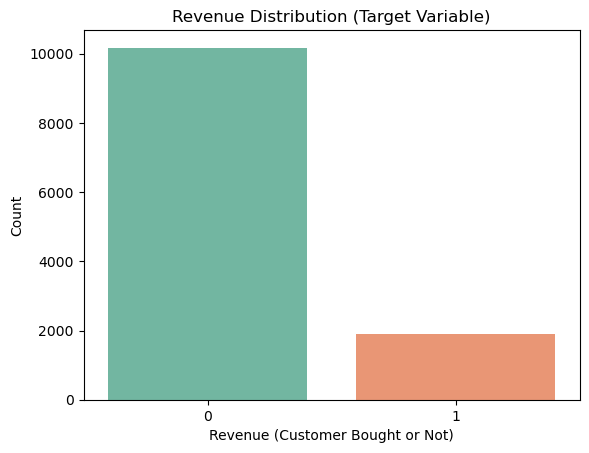

In [12]:
 # Distribution of Target Variable
sns.countplot(x='Revenue', data=df, palette='Set2')
plt.title('Revenue Distribution (Target Variable)')
plt.xlabel('Revenue (Customer Bought or Not)')
plt.ylabel('Count')
plt.show()

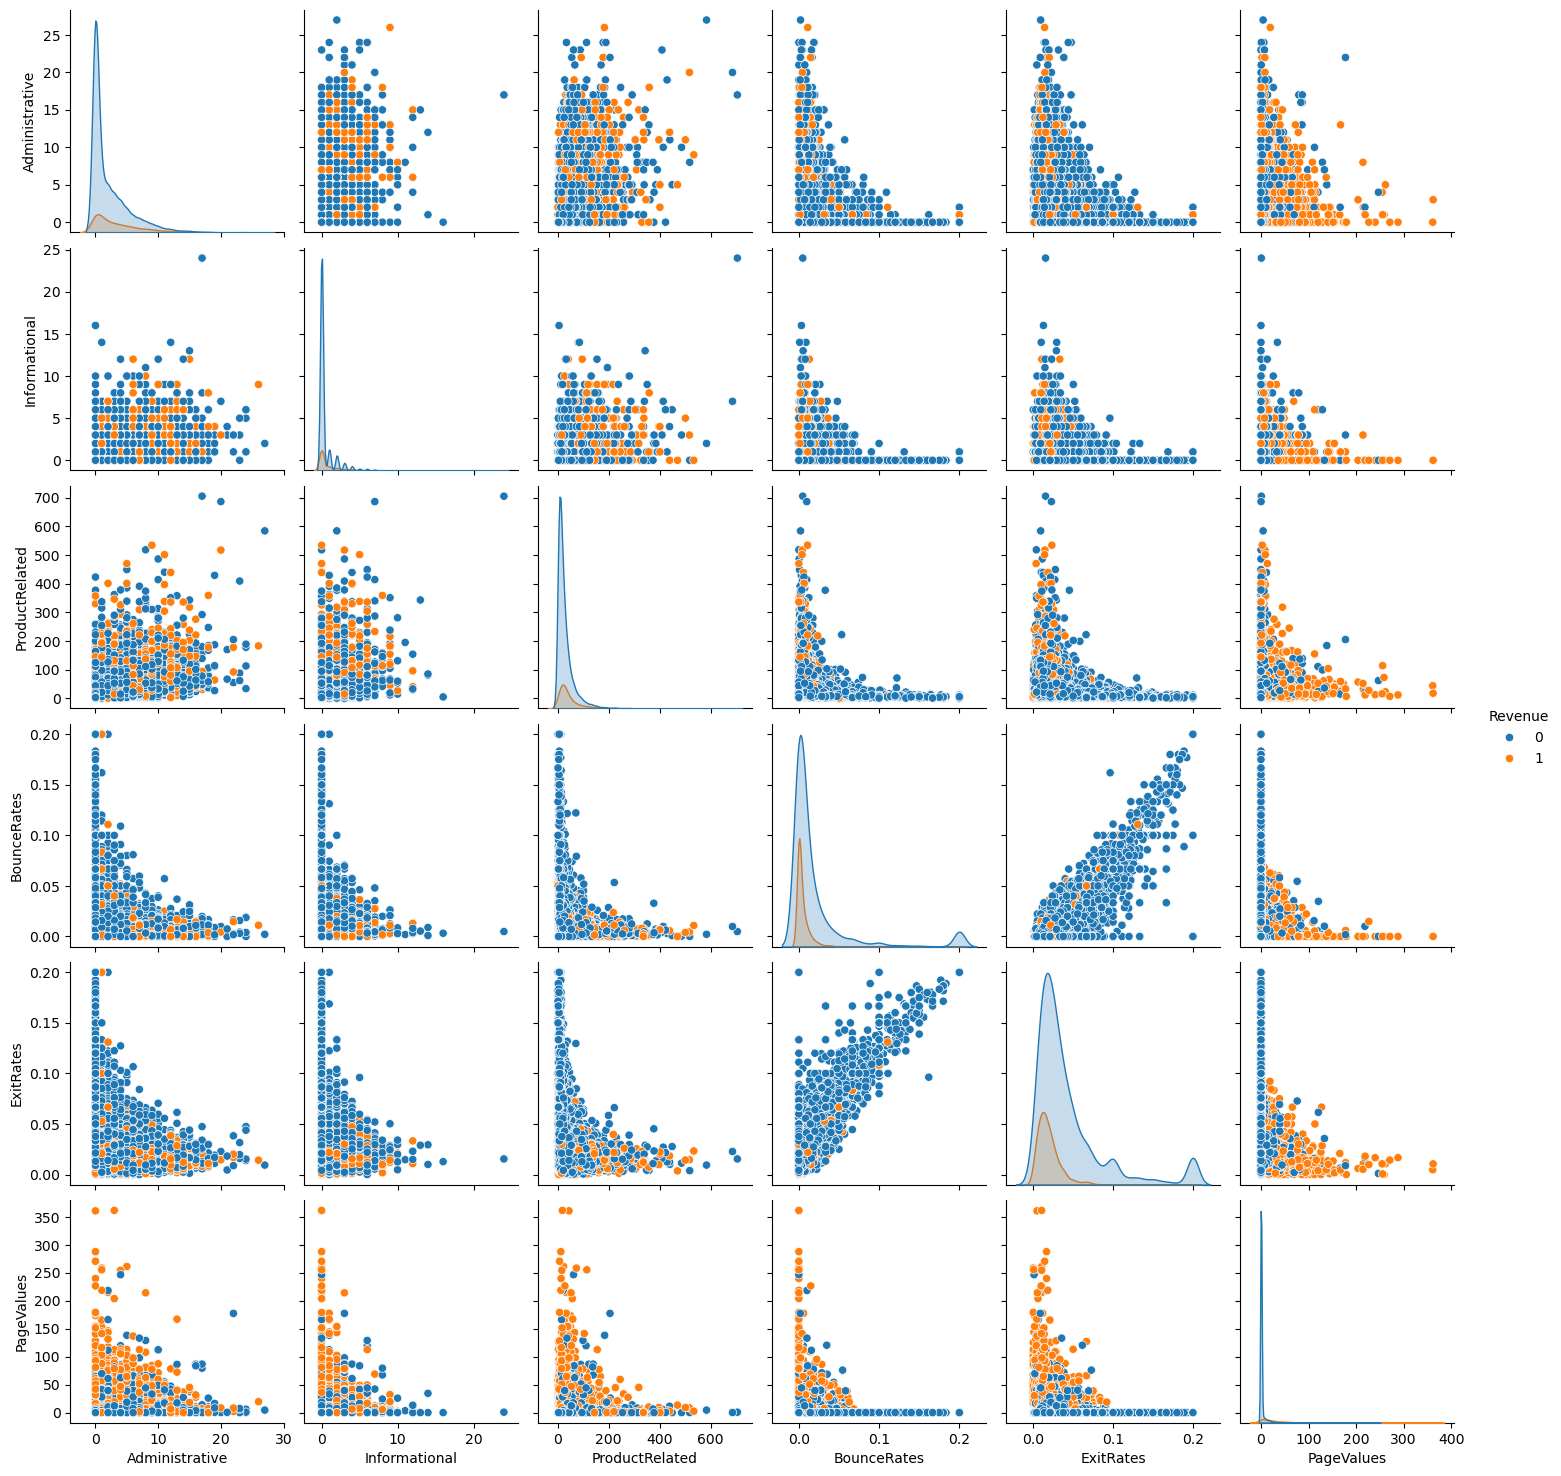

In [13]:
# Pairplot of Key Features vs Revenue
sns.pairplot(df[['Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'ExitRates', 'PageValues', 'Revenue']], hue='Revenue')
plt.show()


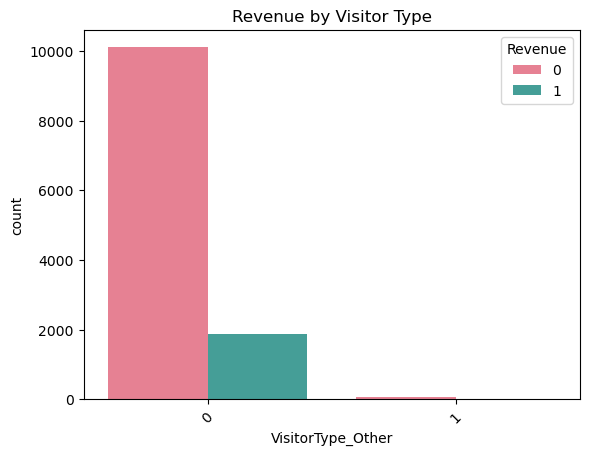

In [14]:
# Revenue By Visitor Type
sns.countplot(x='VisitorType_Other', hue='Revenue', data=df, palette='husl')
plt.title('Revenue by Visitor Type')
plt.xticks(rotation=45)
plt.show()


## Outlier detection and Handling

We can use boxplots to visually detect outliers in significant numerical column of a DataFrame. 

In [15]:
df_copy = df.copy()   # create  a copy of dataframe


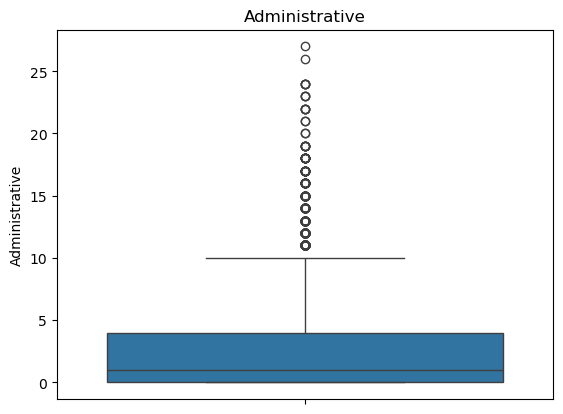

*------------------------------------------------------------------------------------------*


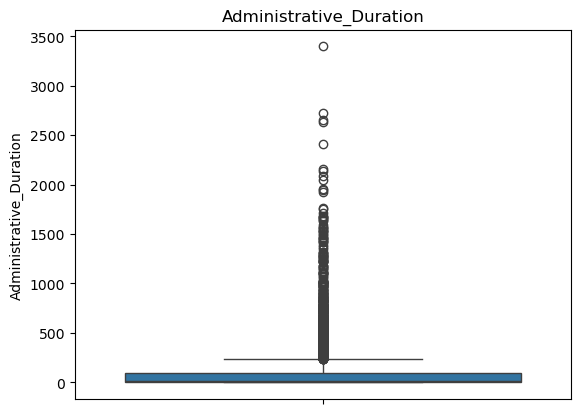

*------------------------------------------------------------------------------------------*


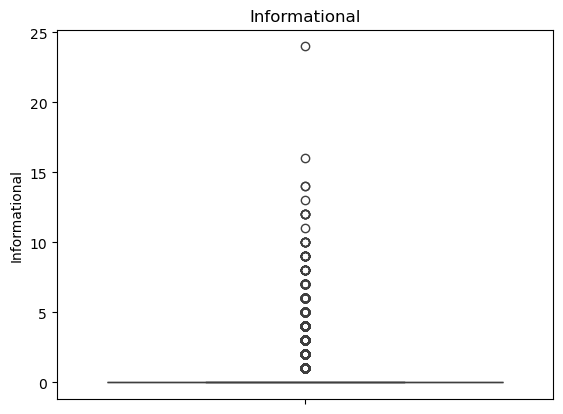

*------------------------------------------------------------------------------------------*


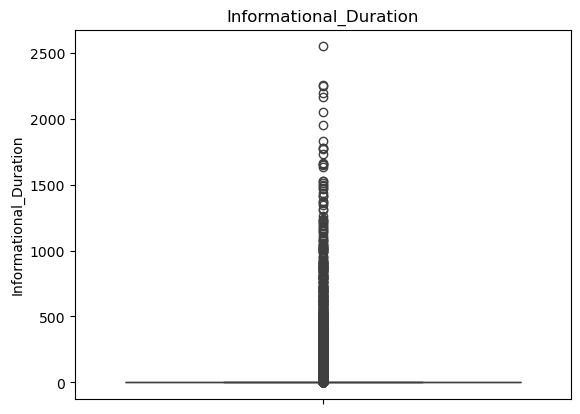

*------------------------------------------------------------------------------------------*


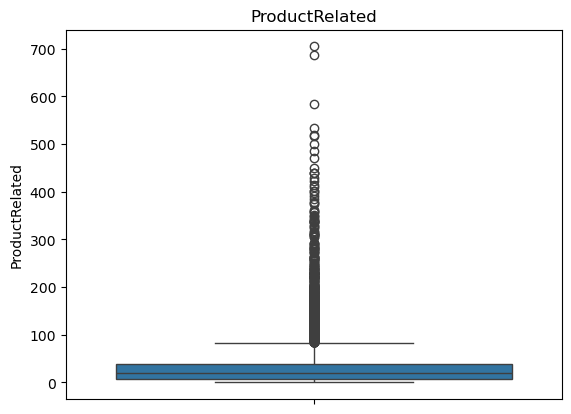

*------------------------------------------------------------------------------------------*


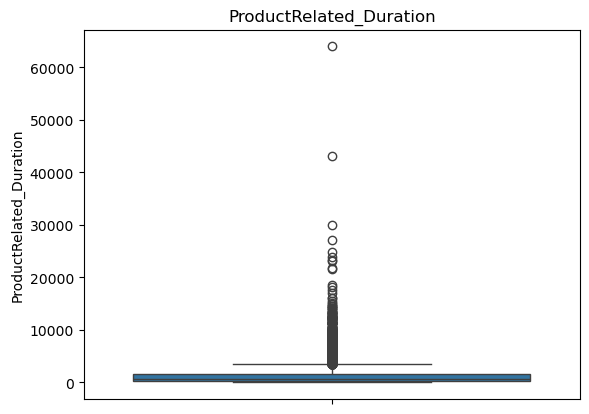

*------------------------------------------------------------------------------------------*


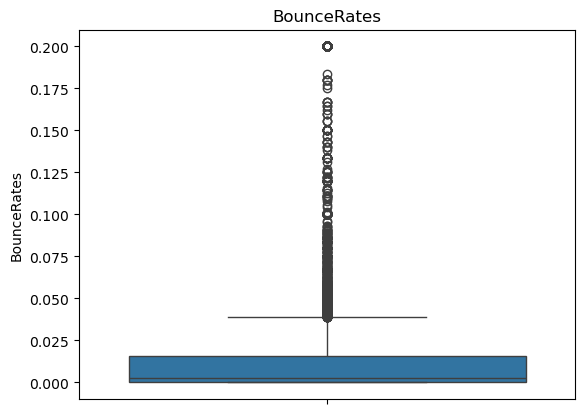

*------------------------------------------------------------------------------------------*


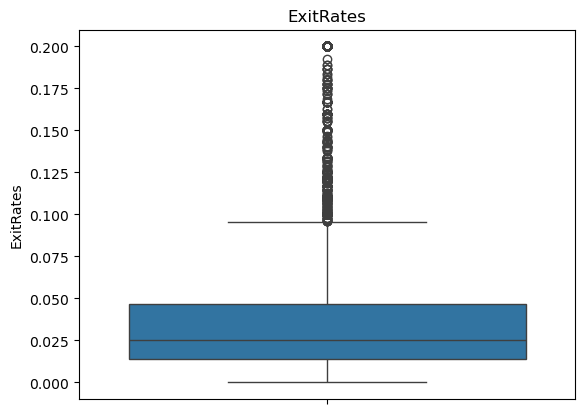

*------------------------------------------------------------------------------------------*


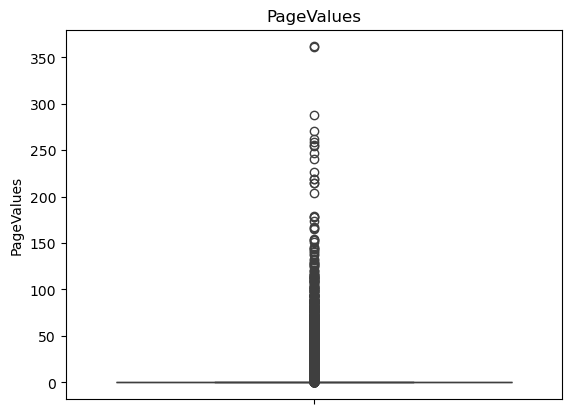

*------------------------------------------------------------------------------------------*


In [16]:
# for these columns we can use for loop to plot boxplot
columns = ['Administrative','Administrative_Duration','Informational','Informational_Duration',	'ProductRelated','ProductRelated_Duration',	'BounceRates','ExitRates','PageValues']
for col in columns:
    sns.boxplot(data = df, y=col)
    plt.title(f'{col}')
    plt.show()
    print("*------------------------------------------------------------------------------------------*")


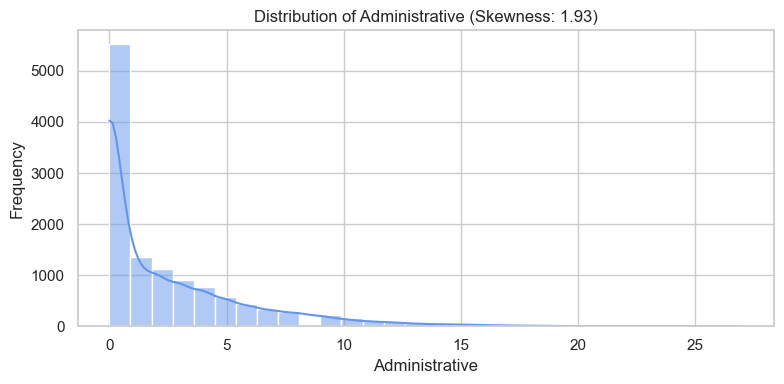

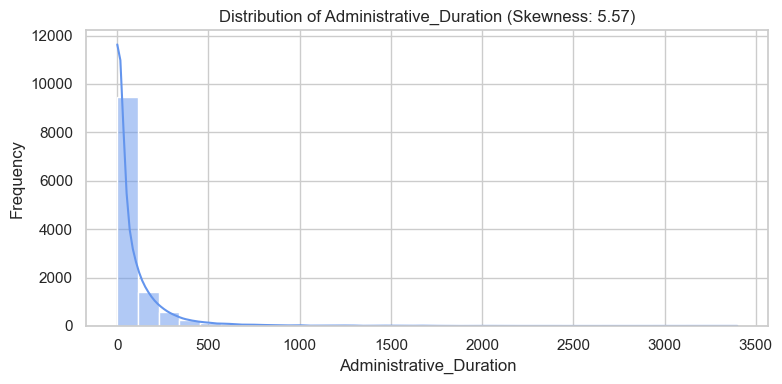

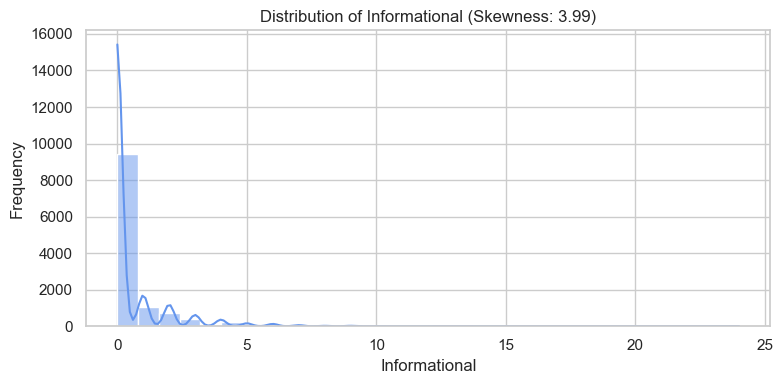

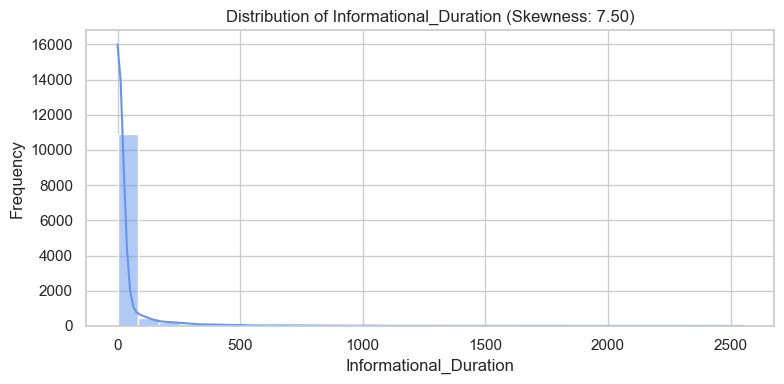

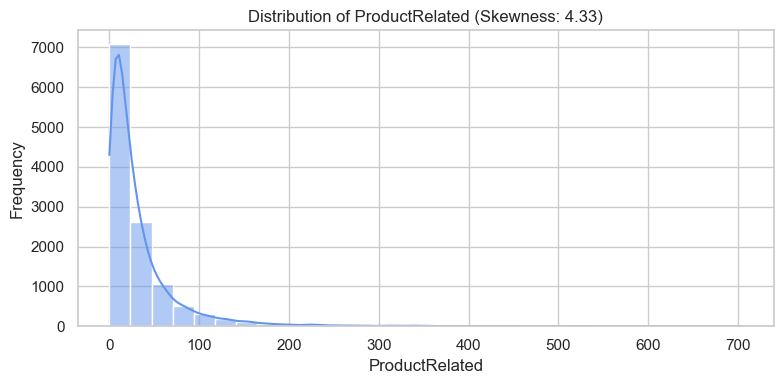

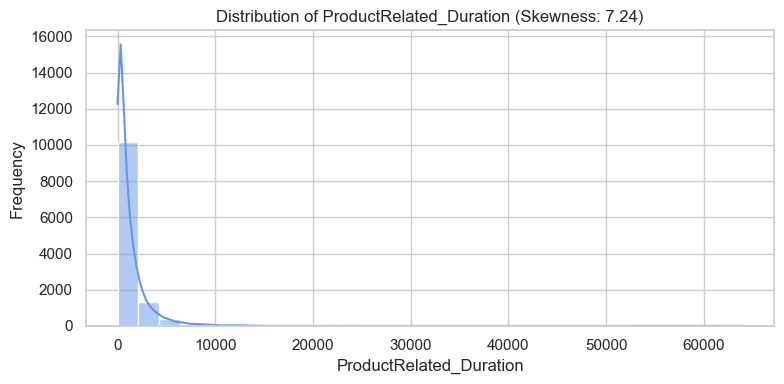

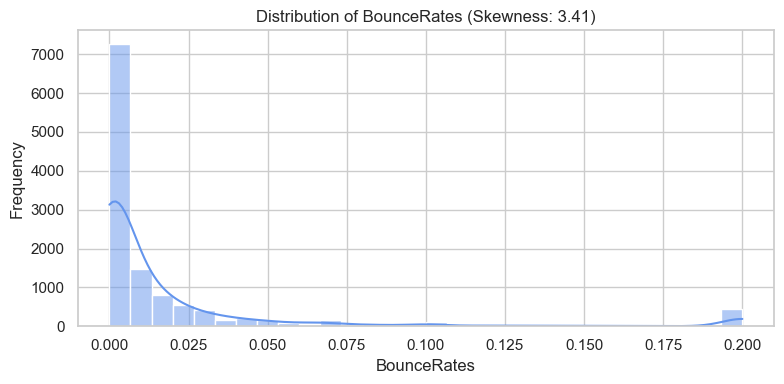

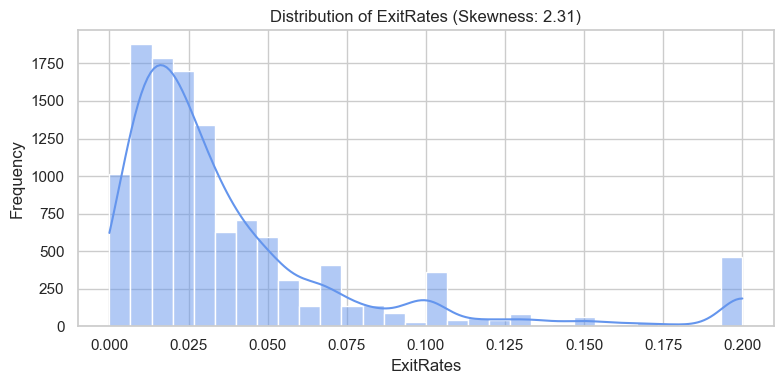

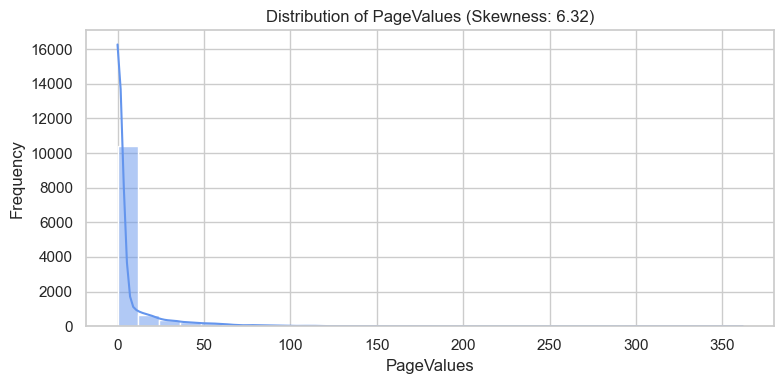

In [17]:
# Calculate skewness for each numerical column

# Dictionary to store skewness values
skewness_dict = {}

# Loop through each column and calculate skewness
for col in columns:
    skew_val = skew(df[col])  # Ensure NaNs are excluded
    skewness_dict[col] = skew_val
# Set plot style
sns.set(style="whitegrid")

# Loop through each column and plot histplot
for col in columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True, color='cornflowerblue', bins=30)
    plt.title(f'Distribution of {col} (Skewness: {df[col].skew():.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



from the above histplot it is clear that there is no column with normal distribution no need to use z score for outlier detection

We can use IQR methods to find outliers for above columns.Defining a class to find ouliers using IQR method and handling outliers
Defining two functions called capping() and trimming()inside the class, which will perform capping and trimming operations respectivly on outlier data.
Depending on outlier size we can call them.Each function will returns a dataframe after performing  trimming or capping.
We can also use imputation or transformation method here using capping and trimming

In [18]:
# Defining a class to find ouliers using IQR method and handling outliers

class OutlierHandling:
    def __init__(self, df):
        self.df = df
        
    # Defining a function to find ouliers using IQR method   
    def IQR(self, column):
        Q1 = self.df[column].quantile(0.25)   #   setting 25 th 	Percentile as Q1
        Q3 = self.df[column].quantile(0.75)    # 75th 	Percentile as Q3
    
        iqr = Q3 - Q1
    
        self.lb = Q1 - 1.5*iqr       # finding lower bound
        self.ub = Q3 + 1.5*iqr       # finding upper bound
    
        outliers = self.df[ (self.df[column] < self.lb ) | (self.df[column] > self.ub) ]

        # Print outliers
        print(f"\nOutliers in '{column}' based on IQR method:")
        print(outliers[[column]])  

    
    # Defining a function for capping
    def capping(self,column):
        self.df[column] = self.df[column].clip(lower = self.lb, upper =self.ub)

    
    # Function for trimming
    def trimming(self,column):
        trimmed_df = self.df[ (self.df[column] < self.lb) & (self.df[column] > self.ub) ]




In [19]:
# creating instance of class
handler = OutlierHandling(df)

for col in columns:
    handler.IQR(col)
    handler.capping(col)


Outliers in 'Administrative' based on IQR method:
       Administrative
62                 12
248                16
282                13
288                11
478                13
...               ...
12209              12
12221              12
12233              13
12236              12
12244              19

[404 rows x 1 columns]

Outliers in 'Administrative_Duration' based on IQR method:
       Administrative_Duration
62                  279.416667
76                 1005.666667
109                 326.250000
128                 462.000000
187                 293.778205
...                        ...
12247               311.136111
12260               262.666667
12265               413.499612
12285               369.333333
12307               305.125000

[1123 rows x 1 columns]

Outliers in 'Informational' based on IQR method:
       Informational
29                 1
57                 2
98                 1
103                1
106                1
...              ...
12307  

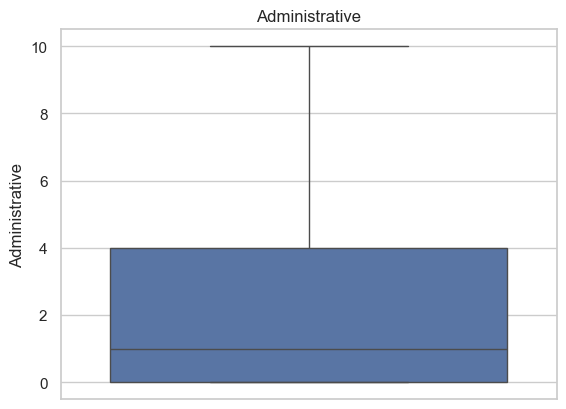

*------------------------------------------------------------------------------------------*


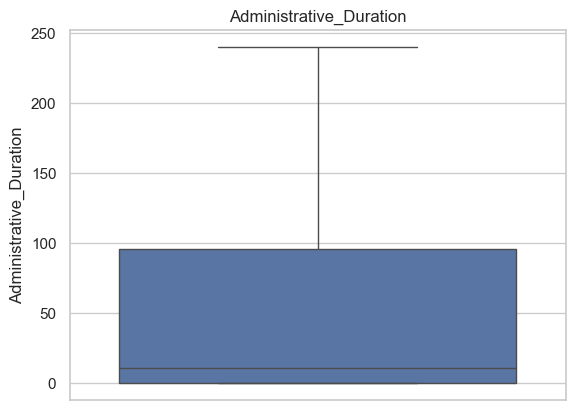

*------------------------------------------------------------------------------------------*


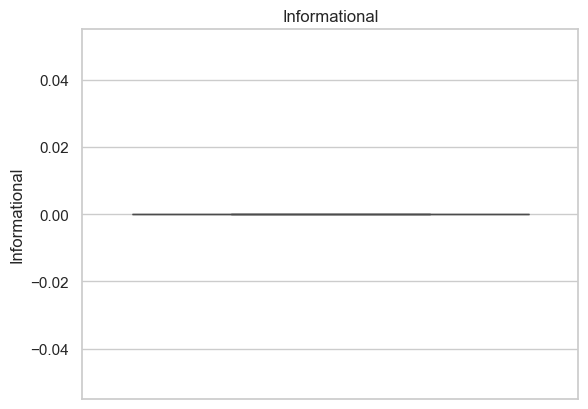

*------------------------------------------------------------------------------------------*


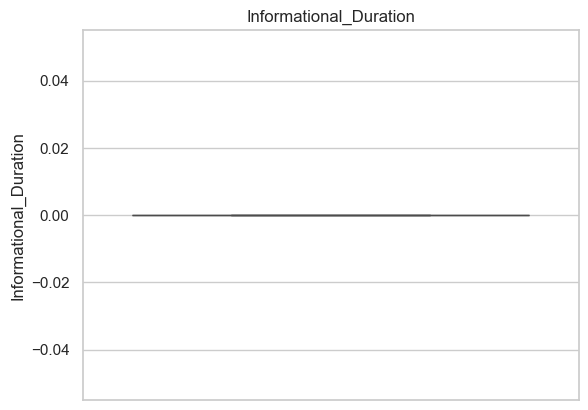

*------------------------------------------------------------------------------------------*


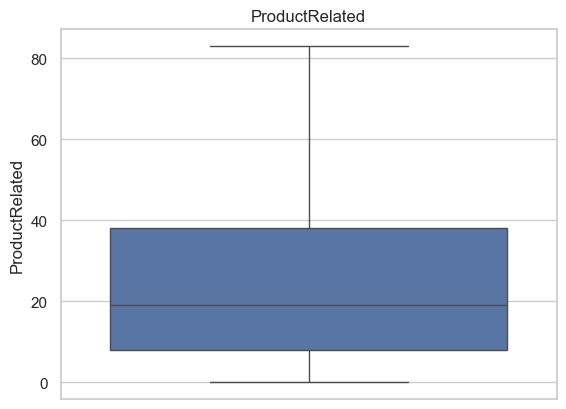

*------------------------------------------------------------------------------------------*


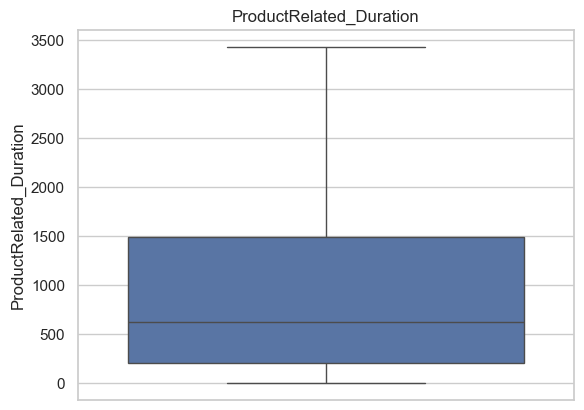

*------------------------------------------------------------------------------------------*


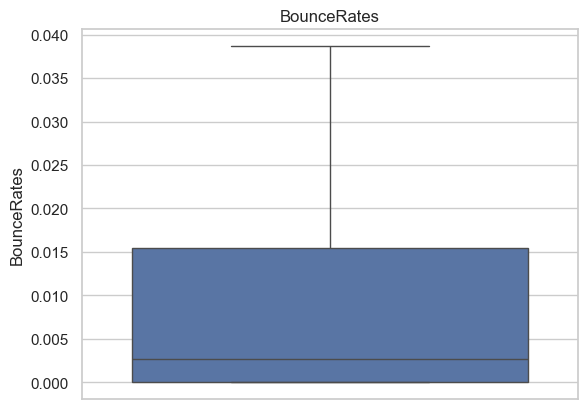

*------------------------------------------------------------------------------------------*


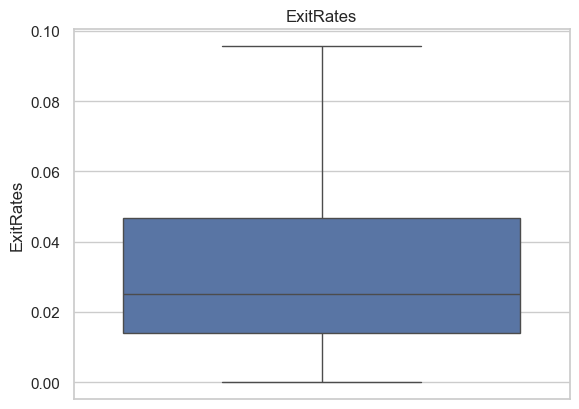

*------------------------------------------------------------------------------------------*


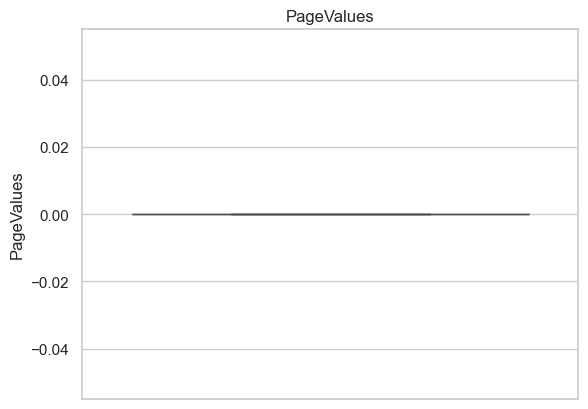

*------------------------------------------------------------------------------------------*


In [20]:
# plotting boxplot after handling outliers
for col in columns:
    sns.boxplot(data = df, y=col)
    plt.title(f'{col}')
    plt.show()
    print("*------------------------------------------------------------------------------------------*")


In [21]:
df_cleaned = df.copy()
df_cleaned

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.038666,0.095614,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.095614,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.038666,0.095614,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.038666,0.095614,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
12327,0,0.0,0,0.0,6,184.250000,0.038666,0.086667,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1


##  Training Testing Split 

In [22]:
# Input (X): All columns except 'Revenue'
X = df.drop('Revenue', axis=1)

# Output (y): Target variable
y = df['Revenue']

In [23]:
# Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


To solve the class imbalance we use technique called SMOTE 

In [32]:
print("Before SMOTE:", y_train.value_counts())

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print("After SMOTE:", y_train.value_counts())

Before SMOTE: Revenue
0    8137
1    8137
Name: count, dtype: int64
After SMOTE: Revenue
0    8137
1    8137
Name: count, dtype: int64


In [29]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.038666,0.095614,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.095614,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.038666,0.095614,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.038666,0.095614,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
12327,0,0.0,0,0.0,6,184.250000,0.038666,0.086667,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1


# Model Implementation 

In [25]:
# Define model for implementation
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True, random_state=42)
}

In [26]:
# Train, Predict, and Evaluate Each Model
for name, model in models.items():

    # Create Pipeline: Scaling and Model
    pipeline = Pipeline([
        ("scaler", StandardScaler()),   # Standardize features
        ("classifier", model)           # Apply ML model
    ])
    print("**************************** ", model ,"******************************")
    
    # Train Model
    pipeline.fit(X_train, y_train)

    # Predictions
    y_pred = pipeline.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f" Accuracy: {acc:.4f}")

    # Classification Report
    print("\n Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    print(" Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

        # Feature Importance (Only for Tree-based Models)
    if hasattr(model, "feature_importances_"):
        print("\n  Feature Importances:")
        importance_df = pd.DataFrame({
            "Feature": X.columns,
            "Importance": model.feature_importances_
        }).sort_values(by="Importance", ascending=False)
        print(importance_df.to_string(index=False))


****************************  LogisticRegression(max_iter=1000, random_state=42) ******************************
 Accuracy: 0.7823

 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2034
           1       0.32      0.35      0.34       382

    accuracy                           0.78      2416
   macro avg       0.60      0.61      0.60      2416
weighted avg       0.79      0.78      0.79      2416

 Confusion Matrix:
[[1757  277]
 [ 249  133]]
****************************  DecisionTreeClassifier(random_state=42) ******************************
 Accuracy: 0.7355

 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.84      2034
           1       0.26      0.37      0.30       382

    accuracy                           0.74      2416
   macro avg       0.57      0.59      0.57      2416
weighted avg       0.77      0.74      0.75      2416

 

In [27]:
# Define hyperparameter grids for each model
param_grids = {
    "Logistic Regression": {
        "classifier__C": [0.01, 0.1, 1, 10],
        "classifier__solver": ["liblinear", "lbfgs"]
    },
    "Decision Tree": {
        "classifier__max_depth": [None, 5, 10, 20],
        "classifier__min_samples_split": [2, 5, 10]
    },
    "KNN": {
        "classifier__n_neighbors": [3, 5, 7, 9],
        "classifier__weights": ["uniform", "distance"]
    },
    "Random Forest": {
        "classifier__n_estimators": [50, 100, 200],
        "classifier__max_depth": [None, 5, 10],
        "classifier__min_samples_split": [2, 5]
    },
    "Gradient Boosting": {
        "classifier__n_estimators": [50, 100, 200],
        "classifier__learning_rate": [0.01, 0.1, 0.2],
        "classifier__max_depth": [3, 5]
    },
    "Naive Bayes": {
        "classifier__var_smoothing": [1e-9, 1e-8, 1e-7]
    },
    "SVM": {
        "classifier__C": [0.1, 1, 10],
        "classifier__kernel": ["linear", "rbf", "poly"]
    }
}


In [28]:
# Train, Predict, and Evaluate Each Model with Hyperparameter Tuning
for name, model in models.items():
    print(f"\n{'*'*20} {name} {'*'*20}")

    # Create pipeline
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", model)
    ])

    # If hyperparameters exist for this model, use GridSearchCV
    if name in param_grids:
        grid_search = GridSearchCV(
            pipeline,
            param_grids[name],
            cv=5,
            scoring="accuracy",
            n_jobs=-1
        )
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        print(f" Best Parameters: {grid_search.best_params_}")
        print(f" Best CV Accuracy: {grid_search.best_score_:.4f}")
    else:
        # No tuning, fit directly
        best_model = pipeline
        best_model.fit(X_train, y_train)

    # Predictions
    y_pred = best_model.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f" Test Accuracy: {acc:.4f}")

    # Classification Report
    print("\n Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    print(" Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Feature Importance (Only for Tree-based Models)
    if hasattr(best_model.named_steps["classifier"], "feature_importances_"):
        print("\n Feature Importances:")
        importance_df = pd.DataFrame({
            "Feature": X.columns,
            "Importance": best_model.named_steps["classifier"].feature_importances_
        }).sort_values(by="Importance", ascending=False)
        print(importance_df.to_string(index=False))



******************** Logistic Regression ********************
 Best Parameters: {'classifier__C': 10, 'classifier__solver': 'liblinear'}
 Best CV Accuracy: 0.8294
 Test Accuracy: 0.7819

 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2034
           1       0.32      0.35      0.34       382

    accuracy                           0.78      2416
   macro avg       0.60      0.61      0.60      2416
weighted avg       0.79      0.78      0.79      2416

 Confusion Matrix:
[[1756  278]
 [ 249  133]]

******************** Decision Tree ********************
 Best Parameters: {'classifier__max_depth': 20, 'classifier__min_samples_split': 10}
 Best CV Accuracy: 0.8301
 Test Accuracy: 0.7500

 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      2034
           1       0.28      0.36      0.32       382

    accuracy                       

## Conclusion

This project aimed to predict whether an online shopper would complete a purchase based on their browsing behavior and session attributes. Several machine learning models were implemented and tuned, including Logistic Regression, Decision Tree, KNN, Random Forest, Gradient Boosting, Naive Bayes, and SVM.

* Random Forest delivered the best performance with a cross-validation accuracy of ~87.8% and a test accuracy of ~80.5%.

* Gradient Boosting also performed competitively, achieving a test accuracy of ~79.4%.

* Although SMOTE was applied to address class imbalance, accuracy did not significantly improve, highlighting that accuracy alone is not a reliable metric for imbalanced datasets.

* Tree-based models identified ExitRates, ProductRelated_Duration, and Month as the most influential features for predicting purchase intention.
